In [2]:
import pickle, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
resDir = '/egr/research-aidd/menghan1/AnchorDrug/resultBaseLine/advBIM_ratio'
files = [f for f in os.listdir(resDir) if f.endswith('balancesample.csv')]
querys = list(set([f.split('_')[5] for f in files]))
idx_code = 1
eps = [float(q.split('-')[idx_code]) for q in querys]
querys = [x for _, x in sorted(zip(eps, querys))]
print(querys)

['AdversarialBIM-0.5-1-0.001', 'AdversarialBIM-0.6-1-0.001', 'AdversarialBIM-0.7-1-0.001', 'AdversarialBIM-0.75-1-0.001', 'AdversarialBIM-0.8-1-0.001', 'AdversarialBIM-0.85-1-0.001', 'AdversarialBIM-0.9-1-0.001']


A549
           acc        f1
0.50  0.704472  0.573588
0.60  0.690658  0.569044
0.70  0.687273  0.565677
0.75  0.685183  0.564325
0.80  0.734089  0.586287
0.85  0.722342  0.585304
0.90  0.704703  0.575359
MCF7
           acc        f1
0.50  0.650453  0.543296
0.60  0.669308  0.553384
0.70  0.641848  0.542118
0.75  0.644044  0.545988
0.80  0.683326  0.561345
0.85  0.698875  0.561941
0.90  0.694208  0.560080
PC3
           acc        f1
0.50  0.695636  0.556752
0.60  0.685356  0.553950
0.70  0.670163  0.546414
0.75  0.683523  0.551182
0.80  0.722788  0.568431
0.85  0.740515  0.575848
0.90  0.737219  0.576348


Text(0, 0.5, 'F1')

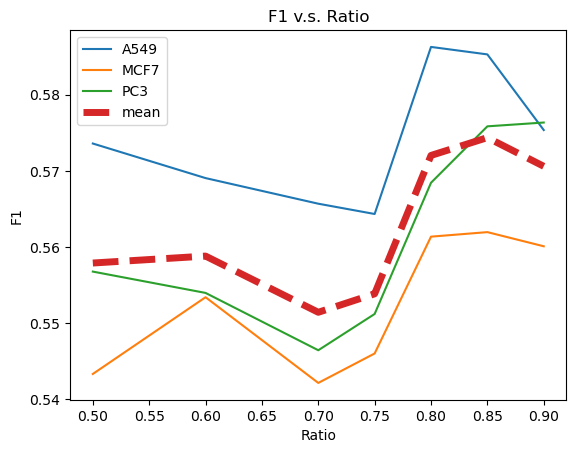

In [7]:
celllist = ['A549', 'MCF7', 'PC3']
y = [0]*7
for c in celllist:
    print(c)
    filesc = [f for f in files if c in f]
    # [print(fq) for fq in filesc]
    f1_all, precision_all, recall_all = [],[],[]
    df_c = pd.DataFrame()
    for q in querys:
        fqc = [f for f in filesc if q in f][0]
        # print(q)
        df = pd.read_csv(f'{resDir}/{fqc}', index_col=0)
        # print(df)
        # print(df.mean(1))
        df_c[float(q.split('-')[idx_code])] = df.mean(1)
        # print(df.T.to_numpy().mean(0))
        # print(df.T.to_numpy().std(0))
    # print(df_c.index)
    print(df_c.loc[['acc', 'f1']].T)
    # df_c.T.to_csv(f'{resDir}/all_summary_{c}.csv')
    y = [df_c.T.f1.to_list()[i] + y[i] for i in range(len(y))]
    x = df_c.T.index.to_list()
    plt.plot(df_c.T.index.to_list(), df_c.T.f1.to_list(), label=c)
plt.plot(x, [e/3 for e in y], '--', label='mean', linewidth=5.0)
plt.legend()
plt.title('F1 v.s. Ratio')
plt.xlabel('Ratio')
plt.ylabel('F1')